In [1]:
import scvelo as scv
import scanpy as sc
import pandas as pd
import numpy as np
import scipy
import anndata as ad

In [2]:
adata = scv.datasets.bonemarrow()

In [3]:
adata = adata[~adata.obs["clusters"].isin(["CLP"]), :]

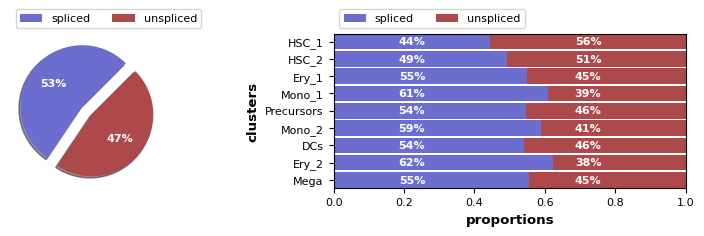

In [4]:
scv.pl.proportions(adata, groupby = "clusters")

In [5]:
scv.pp.filter_and_normalize(adata, min_shared_counts = 20, n_top_genes = 1000)
scv.pp.moments(adata, n_pcs = 30, n_neighbors = 30)

Filtered out 7875 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 1000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:03) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [6]:
sc.tl.leiden(adata)

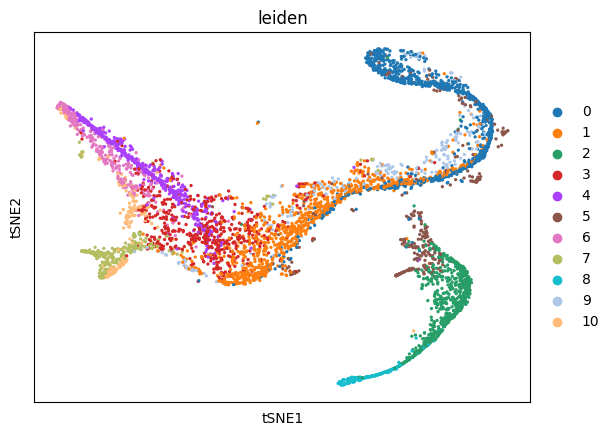

In [7]:
sc.pl.tsne(adata, color = "leiden")

In [8]:
adata.uns["iroot"] = np.flatnonzero(adata.obs["leiden"] == '0')[0]

In [9]:
sc.tl.dpt(adata)

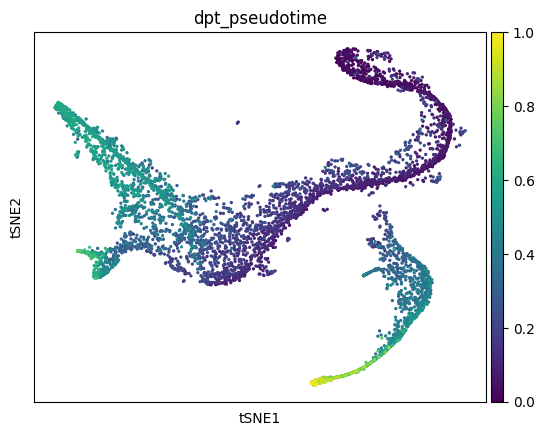

In [10]:
sc.pl.tsne(adata, color = "dpt_pseudotime")

In [11]:
adata

AnnData object with n_obs × n_vars = 5292 × 1000
    obs: 'clusters', 'palantir_pseudotime', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'leiden', 'dpt_pseudotime'
    var: 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'clusters_colors', 'pca', 'neighbors', 'leiden', 'leiden_colors', 'iroot', 'diffmap_evals'
    obsm: 'X_tsne', 'X_pca', 'X_diffmap'
    varm: 'PCs'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu'
    obsp: 'distances', 'connectivities'

In [12]:
adata.write_h5ad("data/JuloVelo_pre.h5ad")